In [50]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import DBSCAN, MeanShift, estimate_bandwidth, KMeans, OPTICS, cluster_optics_dbscan, AffinityPropagation
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns

In [51]:
df = pd.read_csv("CleanedColumn.csv", delimiter=",")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229835 entries, 0 to 229834
Data columns (total 35 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   idart                             229835 non-null  int64 
 1   idrt                              229835 non-null  int64 
 2   weight_final                      229835 non-null  object
 3   PSU                               229835 non-null  int64 
 4   STRATA                            229835 non-null  int64 
 5   province                          229835 non-null  int64 
 6   gender                            229835 non-null  int64 
 7   age                               229835 non-null  int64 
 8   education                         229835 non-null  int64 
 9   work_status                       229835 non-null  int64 
 10  injured_past_year                 229835 non-null  int64 
 11  head_injury                       229835 non-null  int64 
 12  ch

In [52]:
df.drop(columns=['idart', 'idrt','province', 'work_status', 'education', 'gender', 'age', 'place_of_injury'], inplace=True)
print(df.columns.tolist())

['weight_final', 'PSU', 'STRATA', 'injured_past_year', 'head_injury', 'chest_injury', 'back_injury', 'stomach_injury', 'upper_body_injury', 'lower_body_injury', 'bruises', 'cuts', 'sprains', 'broken_bones', 'severed_limbs', 'eye_injury', 'brain_damage', 'internal_damage', 'burns', 'other', 'impaired', 'missing_body_parts', 'permanent_injury', 'emotional_mental_health_disorder', 'Bobot_Normal', 'filter_$', 'time']


In [53]:
# df.head()

In [54]:
# print(df.isnull().sum())

In [55]:
# df.dtypes

In [56]:
df.rename(columns={"Bobot_Normal": "weight_normal"}, inplace=True)

In [57]:
df.head()

,weight_final,PSU,STRATA,injured_past_year,head_injury,chest_injury,back_injury,stomach_injury,upper_body_injury,lower_body_injury,...,internal_damage,burns,other,impaired,missing_body_parts,permanent_injury,emotional_mental_health_disorder,weight_normal,filter_$,time
0,"21,6834964752197",8620,301,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,",0448737734914915",1,1
1,"21,6834964752197",8620,301,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,",0448737734914915",1,1
2,"21,6834964752197",8620,301,2,0,0,0,0,0,0,...,0,0,0,0,0,0,1,",0448737734914915",1,1
3,"7,12305355072021",8620,301,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,",0147410862435434",1,1
4,"27,1446380615234",8620,301,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,",056175549975225",1,1


In [58]:
df["weight_final"] = df["weight_final"].astype(str).str.replace(",", "").astype(float)

In [59]:
df["weight_normal"] = df["weight_normal"].astype(str).str.replace(",", "").astype(float)

In [60]:
df.dtypes

weight_final                        float64
PSU                                   int64
STRATA                                int64
injured_past_year                     int64
head_injury                           int64
chest_injury                          int64
back_injury                           int64
stomach_injury                        int64
upper_body_injury                     int64
lower_body_injury                     int64
bruises                               int64
cuts                                  int64
sprains                               int64
broken_bones                          int64
severed_limbs                         int64
eye_injury                            int64
brain_damage                          int64
internal_damage                       int64
burns                                 int64
other                                 int64
impaired                              int64
missing_body_parts                    int64
permanent_injury                

In [61]:
df.drop(columns=['weight_normal', 'weight_final', 'PSU', 'STRATA'], inplace=True)

In [62]:
df['emotional_mental_health_disorder'].value_counts()

emotional_mental_health_disorder
0    209207
1     20628
Name: count, dtype: int64

In [63]:
df_0 = df[df['emotional_mental_health_disorder'] == 0]
df_1 = df[df['emotional_mental_health_disorder'] == 1]

df_sample = df_0.sample(n=20628)

print(df_sample)

        injured_past_year  head_injury  chest_injury  back_injury  \
219177                  1            2             2            2   
65715                   2            0             0            0   
50600                   2            0             0            0   
188458                  2            0             0            0   
184497                  2            0             0            0   
...                   ...          ...           ...          ...   
125879                  2            0             0            0   
18096                   2            0             0            0   
170830                  2            0             0            0   
57644                   2            0             0            0   
201041                  2            0             0            0   

        stomach_injury  upper_body_injury  lower_body_injury  bruises  cuts  \
219177               2                  2                  1        1     2   
65715        

In [64]:
df_mental = pd.concat([df_sample, df_1])

df_mental.sample(frac=1, random_state=1).reset_index(drop=True)

,injured_past_year,head_injury,chest_injury,back_injury,stomach_injury,upper_body_injury,lower_body_injury,bruises,cuts,sprains,...,brain_damage,internal_damage,burns,other,impaired,missing_body_parts,permanent_injury,emotional_mental_health_disorder,filter_$,time
0,1,2,2,2,2,1,1,1,2,1,...,2,2,2,2,2,2,2,1,1,1
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
2,1,2,2,2,2,1,2,2,1,2,...,2,2,2,2,2,2,1,1,1,1
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41251,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
41252,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
41253,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
41254,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [65]:
X = df_mental.drop(['emotional_mental_health_disorder'], axis=1).values
imputer = SimpleImputer()
X = imputer.fit_transform(X)

y = df_mental['emotional_mental_health_disorder'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5534415899175957


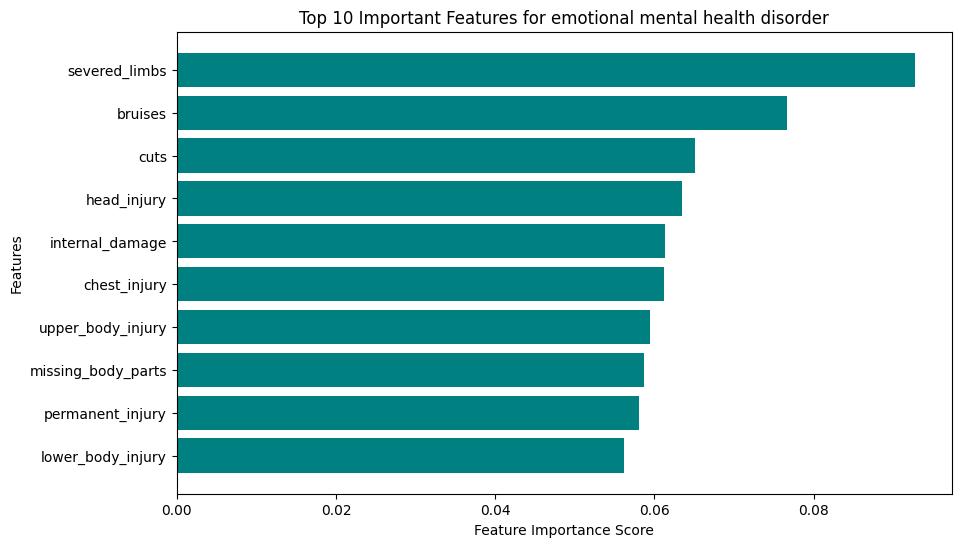

In [68]:
X_train_df = pd.DataFrame(X_train, columns=df.drop(columns=["emotional_mental_health_disorder"]).columns)

feature_importance = model.feature_importances_
features = np.array(X_train_df.columns)

sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10,6))
plt.barh(features[sorted_idx][:10], feature_importance[sorted_idx][:10], color='teal')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Top 10 Important Features for emotional mental health disorder")
plt.gca().invert_yaxis() 
plt.show()
